Ignacio Vellido Expósito

## EJERCICIOS ##

<ul>
<li>Sobre la imagen *woman.png* 
<ol>
    <li>Mostrar los  canales rojo,verde y azul
    <li>Obtener diferentes coloreados usando el mapa de color JET, SPRING, etc y mostrarlos
    <li>Anular la banda roja de la imagen y mostrarla.
</ol>
</ul>    

In [19]:
# Función para mostrar varias imágenes en una sola ventana
import numpy as np

def plot_vector_img(vim, cols=0, titles=None, suptitle=None, gray=False):
    """ Visualiza varias imágenes a la vez """
    n_images = len(vim)

    if not cols:
        cols = 7 if len(vim) >= 7 else len(vim)

    if titles is None:
        titles = ['' for i in range(1, n_images+1)]

    if suptitle is None:
          suptitle = ''

    fig = plt.figure()
    for n, (image, title) in enumerate(zip(vim, titles)):
        a = fig.add_subplot(int(np.ceil(n_images/float(cols))), cols, n+1)          
        plt.imshow(image, "gray" if gray else None)        

        a.set_title(title)        
        a.axis('off')    

    fig.suptitle(suptitle)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    fig.subplots_adjust(bottom=0)

    plt.show()

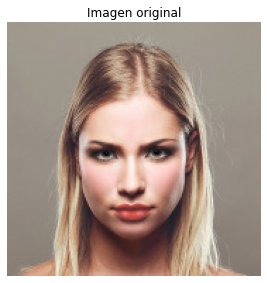

In [27]:
import cv2
from matplotlib import pyplot as plt

# Cargando la imagen
img_bgr = cv2.imread("woman.png")
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plot_vector_img([img_rgb], titles=["Imagen original"])

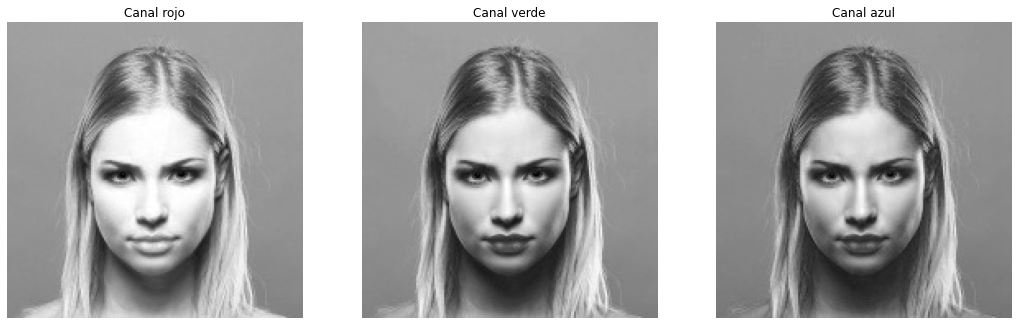

In [28]:
# Separando los canales
img_b = img_bgr[:,:,0]
img_g = img_bgr[:,:,1]
img_r = img_bgr[:,:,2]

plot_vector_img([img_r, img_g, img_b], 
                titles=["Canal rojo", "Canal verde", "Canal azul"], 
                gray=True)

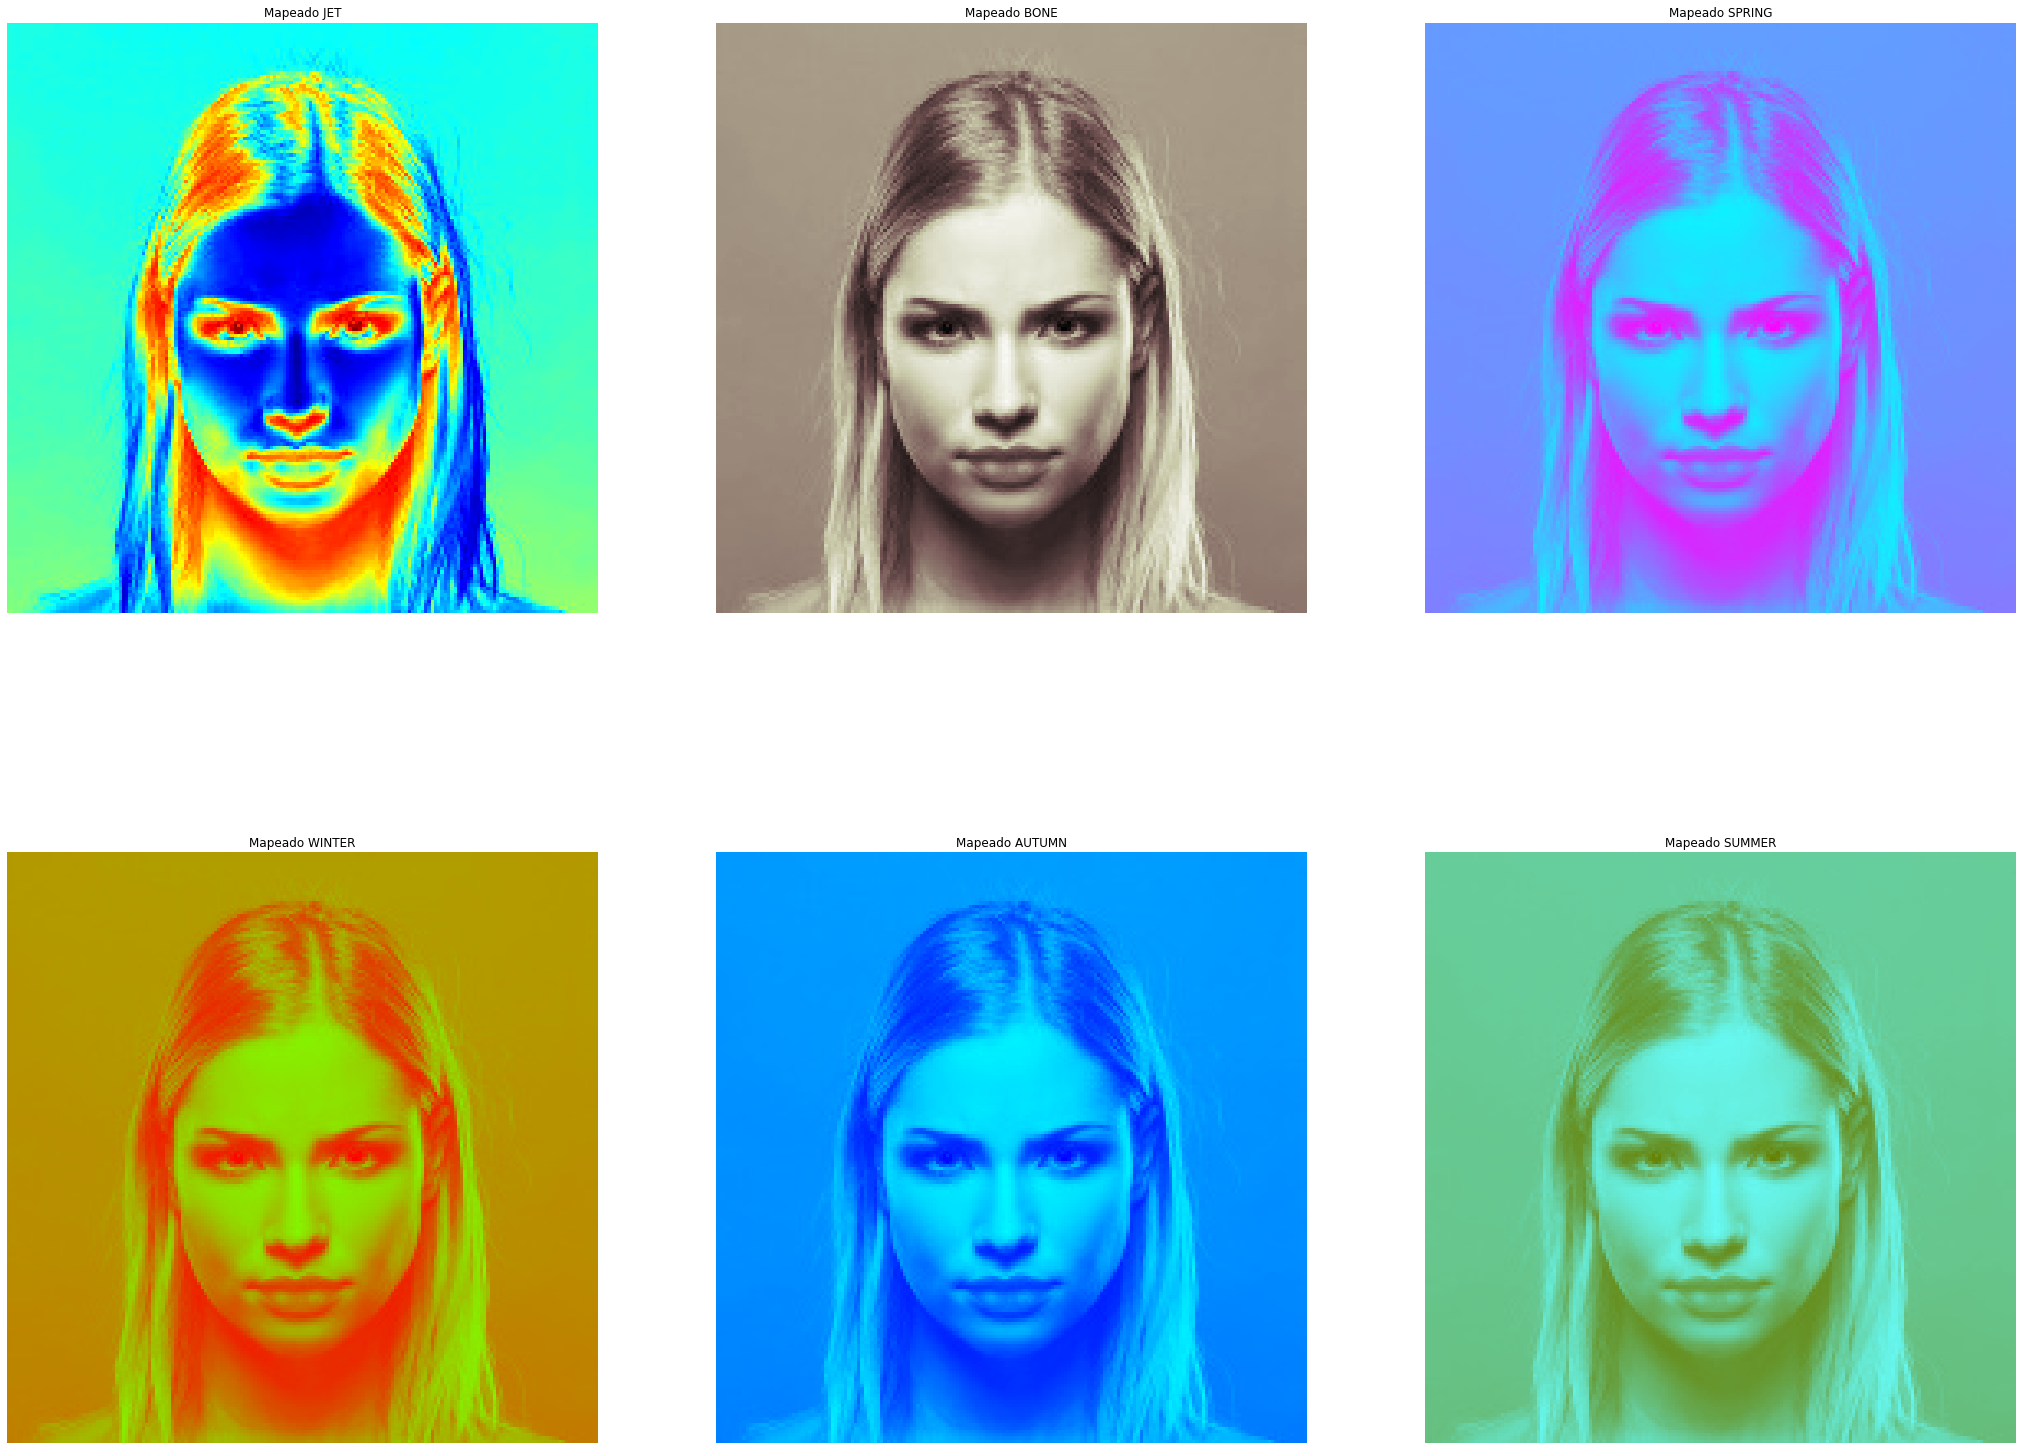

In [29]:
# Mostrando diferentes mapeados
img_jet = cv2.applyColorMap(img_bgr, cv2.COLORMAP_JET)
img_bon = cv2.applyColorMap(img_bgr, cv2.COLORMAP_BONE)
img_spr = cv2.applyColorMap(img_bgr, cv2.COLORMAP_SPRING)
img_win = cv2.applyColorMap(img_bgr, cv2.COLORMAP_WINTER)
img_aut = cv2.applyColorMap(img_bgr, cv2.COLORMAP_AUTUMN)
img_sum = cv2.applyColorMap(img_bgr, cv2.COLORMAP_SUMMER)

imgs = [img_jet, img_bon, img_spr, img_win, img_aut, img_sum]
titles = ["Mapeado JET", "Mapeado BONE", "Mapeado SPRING",
            "Mapeado WINTER", "Mapeado AUTUMN", "Mapeado SUMMER"]

plot_vector_img(imgs, 3, titles=titles)

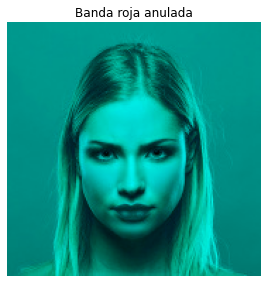

In [22]:
# Anulando la banda roja
img_no_r = img_rgb.copy()
img_no_r[:,:,0] = 0

plot_vector_img([img_no_r], titles=["Banda roja anulada"])

Crear una imagen de 100x100 en el que las filas 0-25 tengan el valor 0, las filas en el rango 26-50 tenga el valor 64, las filas en el rango 51-75 tenga el valor 128 y las filas en el rango 76-100 tengan el valor 255. A continuación convertir la imagen al rango 0-1. Mostrar ambas imagenes.

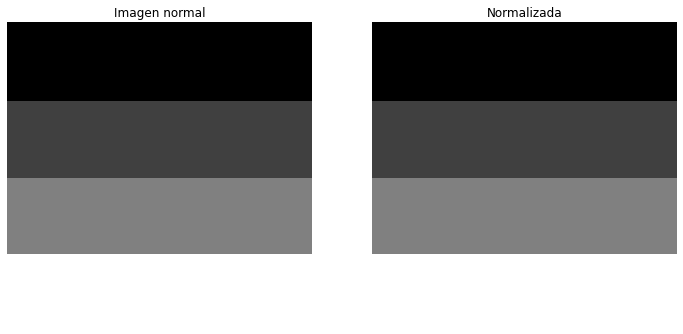

In [23]:
import numpy as np

img = np.zeros((100,100))
img[26:51,:] = 64
img[51:76,:] = 128
img[76:101,:] = 255

img_norm = cv2.normalize(img.astype('float'), None, 
                         0.0, 1.0, cv2.NORM_MINMAX)

plot_vector_img([img, img_norm], titles=["Imagen normal", "Normalizada"], gray=True)